In [66]:
from PIL import Image, ImageDraw, ImageOps
import pylab as pl
import random

'/Users/lyra/opt/anaconda3/lib/python3.7/site-packages/PIL/ImageDraw.py'

In [13]:
fridge = Image.open('./img_out/refrigerator_84/refrigerator_hori_flip_1.bmp','r')
sink = Image.open('./img_out/commercial_sink_393/commercial_hori_flip_1.bmp','r')
cook = Image.open('./img_out/cooktop_366/cooktop_hori_flip_1.bmp','r')

print(fridge)
print(sink)
print(cook)

<PIL.PngImagePlugin.PngImageFile image mode=1 size=300x300 at 0x7FCBBF784C90>
<PIL.PngImagePlugin.PngImageFile image mode=1 size=300x300 at 0x7FCBBF817B90>
<PIL.PngImagePlugin.PngImageFile image mode=1 size=300x300 at 0x7FCBBF817FD0>


## 比例
原始图像均为300\*300，有白边
1px = 0.20cm
90cm\*90cm
采样问题 缩放后不能小于原尺寸

### 冰箱（正方形）
60cm\*60cm => 300\*300
提取后**短边**缩放到300
~~不进行提取缩放~~
### 灶台（正方形、长方形）
约76cm\*45cm => 380\*225
约76cm\*76cm => 380\*380
提取后**长边**缩放到380
### 水池（长方形）
约76cm\*45cm => 380\*225
提取后**长边**缩放到380


### 厨房形状
* 正方形 300cm\*300cm => 1500\*1500 (1550\*1550留边)

    门 右下方
     
    冰箱 右下靠近门 左上角位置(1000\~1150,1200\~1225)
    
    水池线 y=275\~350
    
    灶台线 x=275\~350 x=430\~505
    
    水池 左上角(40\~y-230,x+200\~1350-x)
    
    灶台 左上角(y+200\~1300-y,40\~x-230 or x-385)

* 长方形
* 不规则

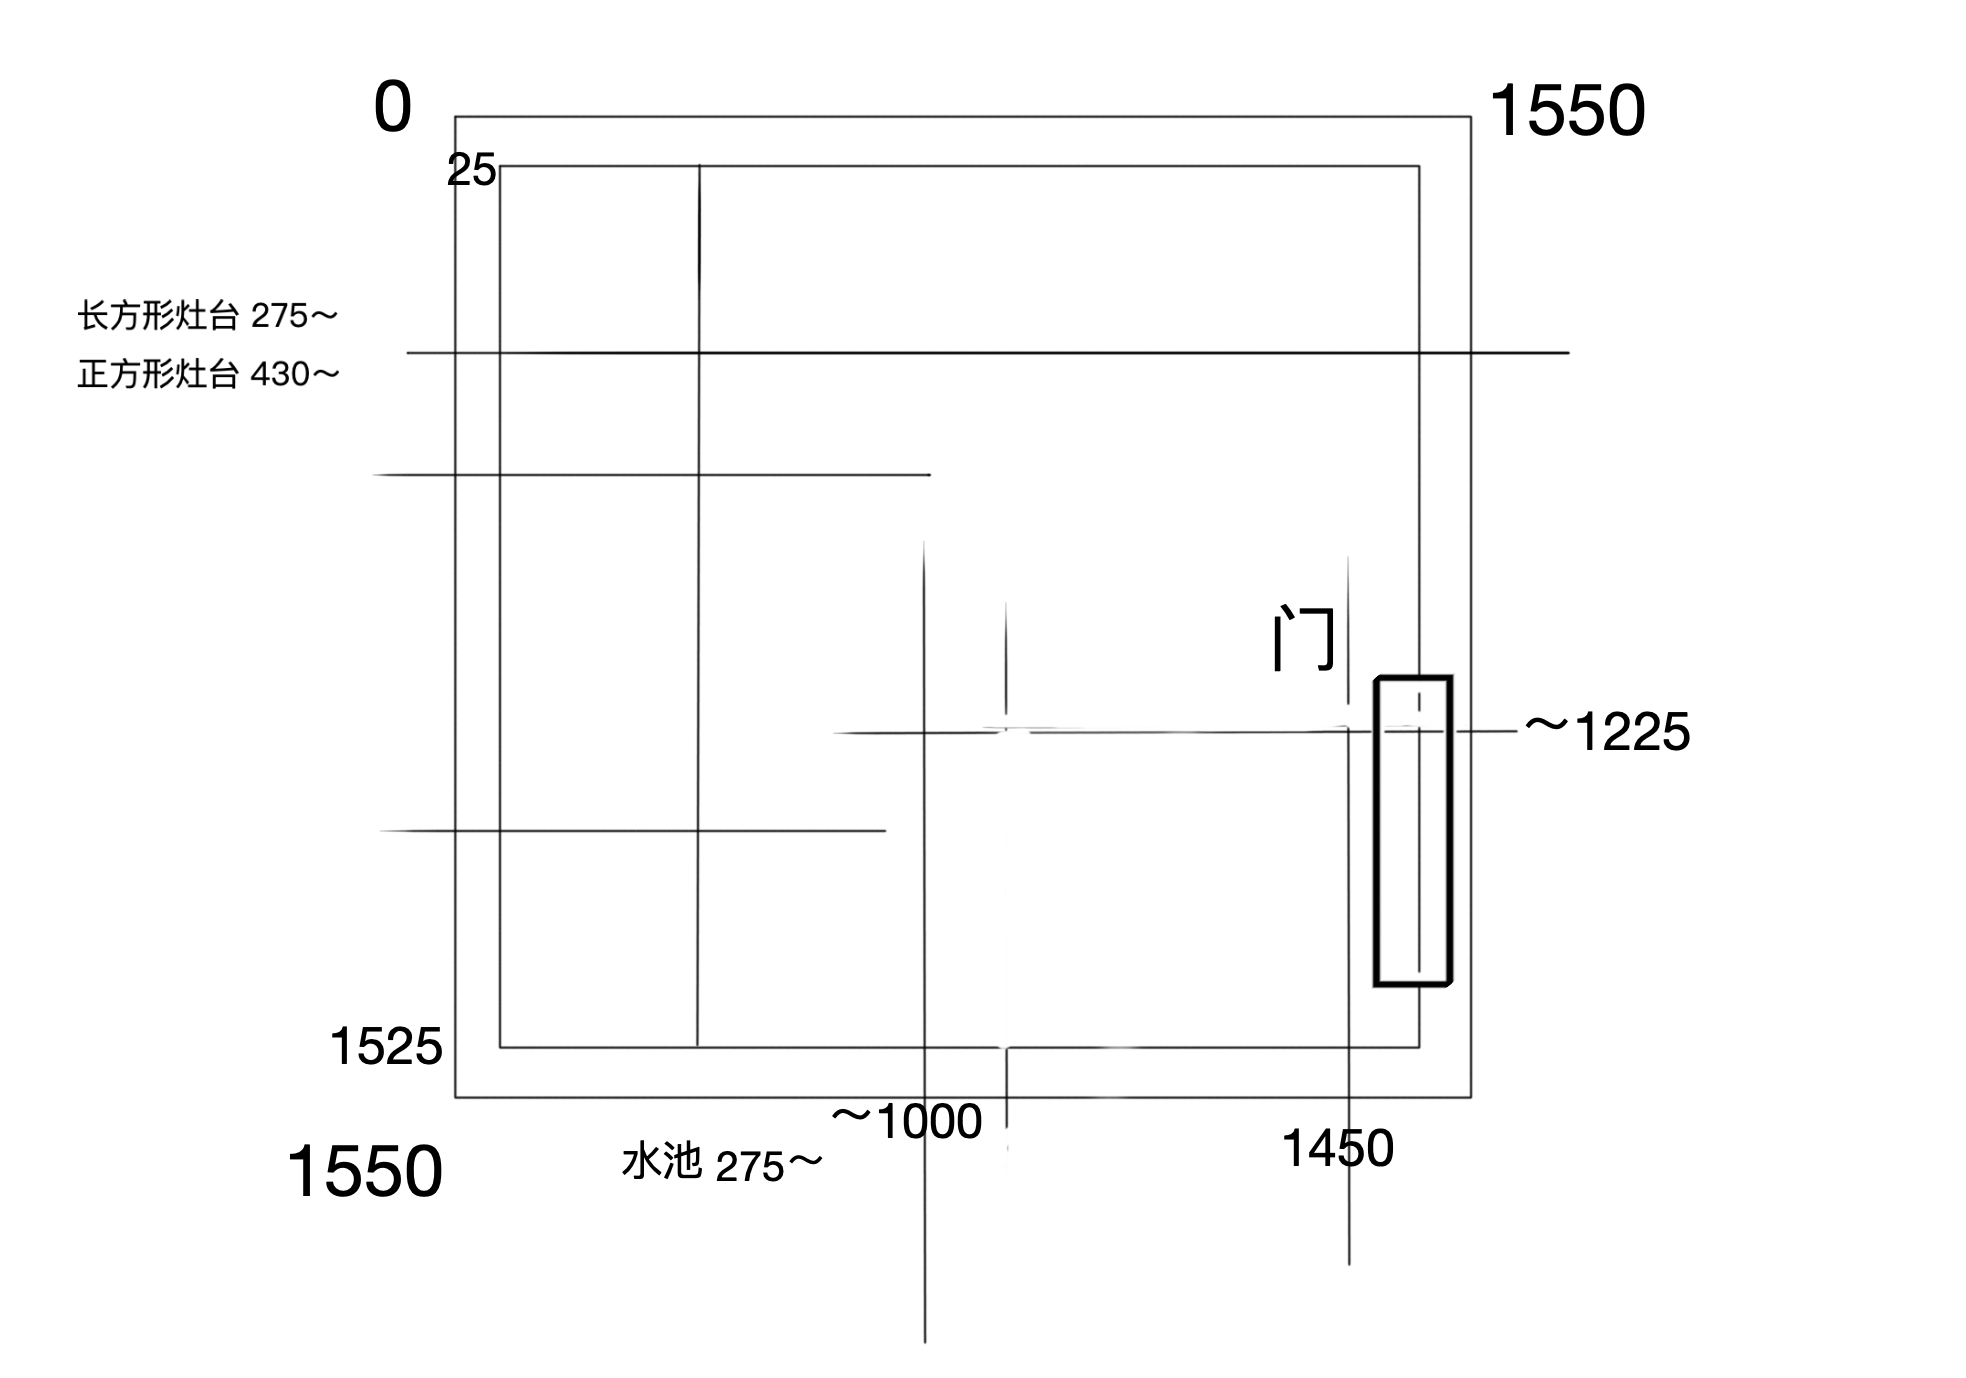

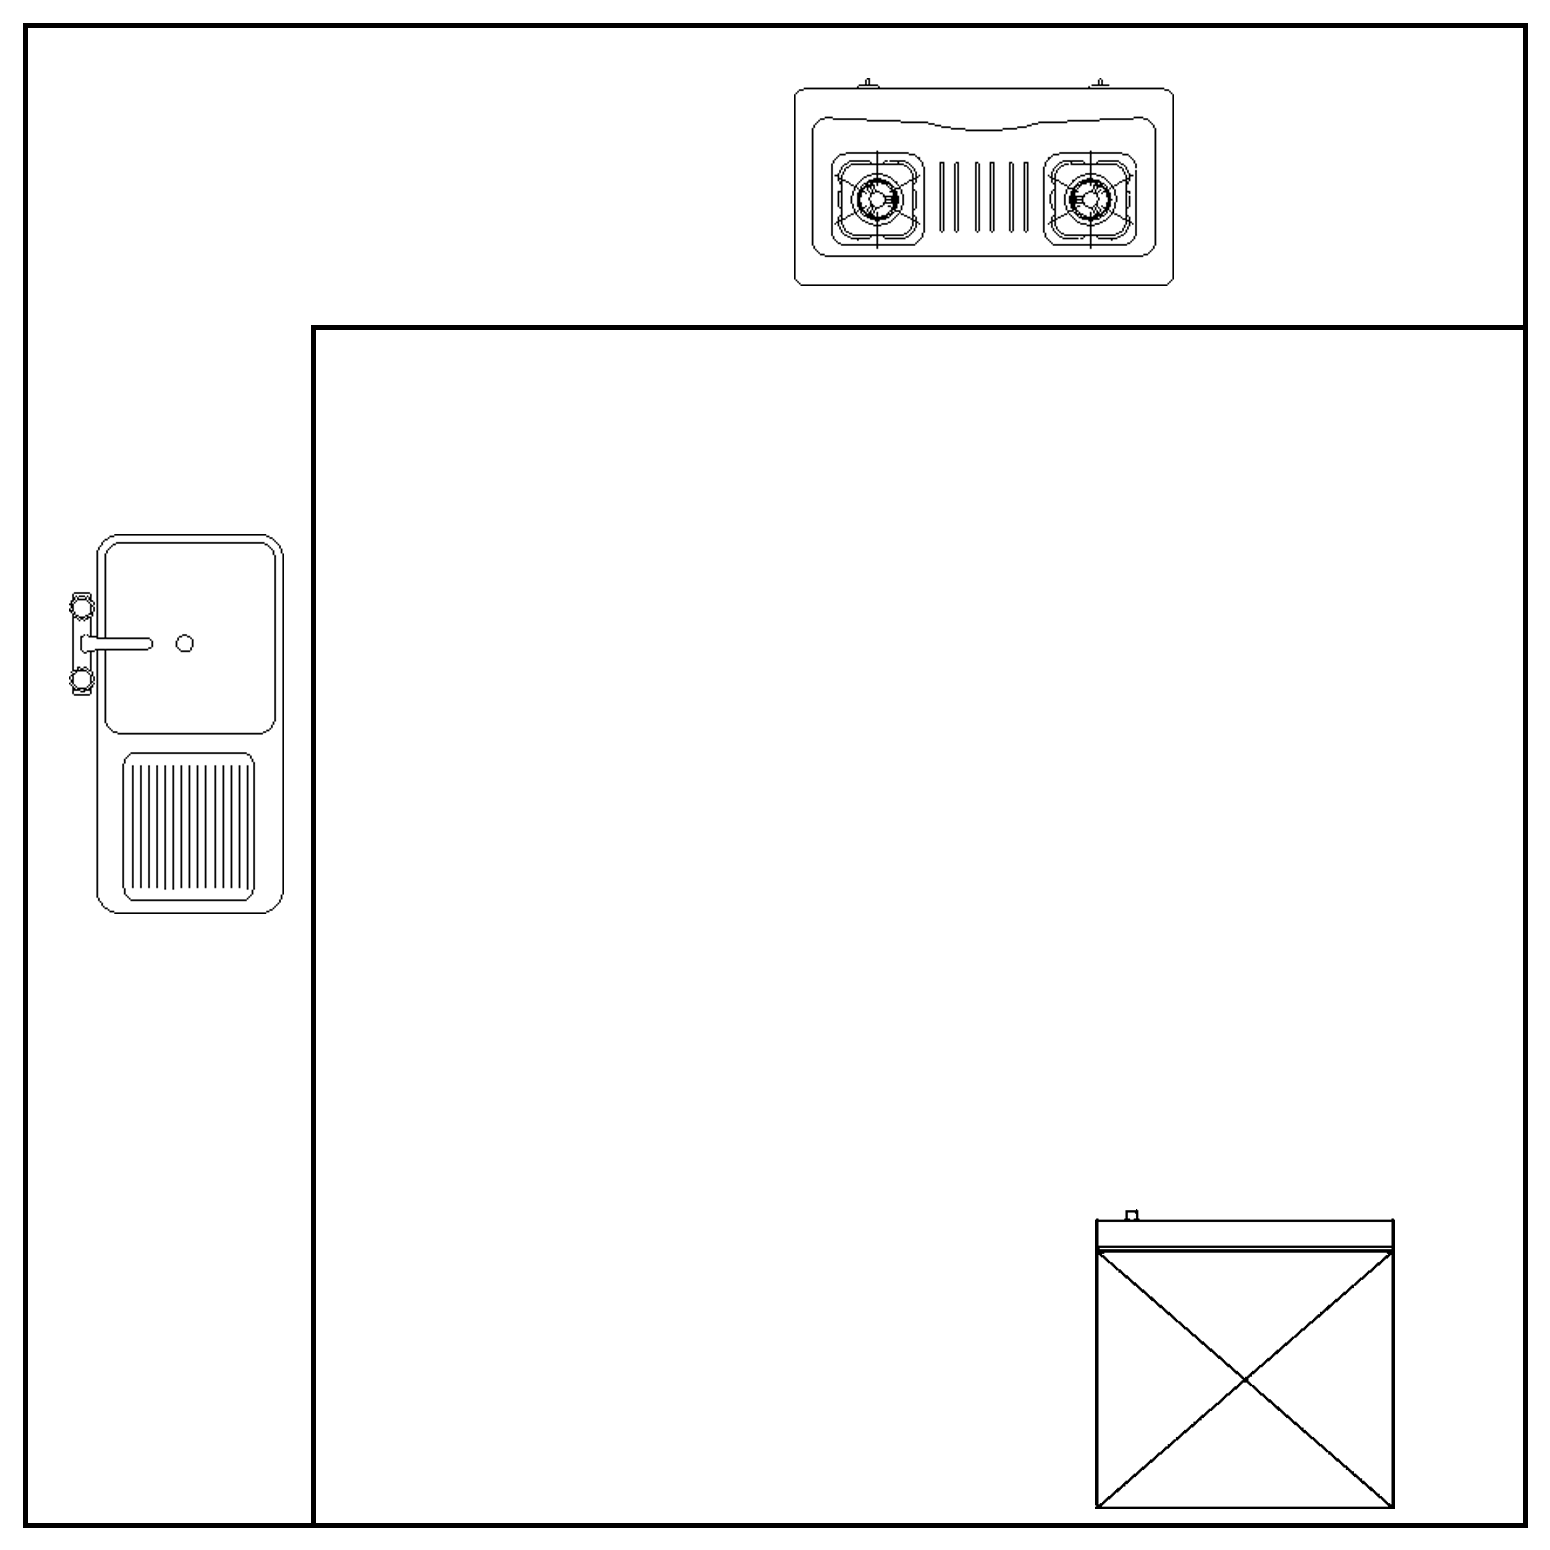

In [249]:
fridge_number = random.randint(1,28)
sink_number = random.randint(1,131)
cook_number = random.randint(1,122)
fridge = Image.open('./img_out/refrigerator_84/refrigerator_hori_flip_'+str(fridge_number)+'.bmp','r')

sink = Image.open('./img_out/commercial_sink_393/commercial_hori_flip_'+str(sink_number)+'.bmp','r')
cook = Image.open('./img_out/cooktop_366/cooktop_hori_flip_'+str(cook_number)+'.bmp','r')

#画轮廓
kitchen = Image.new('RGB',(1550,1550),(255,255,255))
draw = ImageDraw.Draw(kitchen)
width = random.randrange(3,10,2)
width_half = int(width/2)
draw.line((25,25-width_half,25,1525),width = width,fill = 1)
draw.line((25-width_half,1525,1525,1525),width = width,fill = 1)
draw.line((1525,1525+width_half,1525,25),width = width,fill = 1)
draw.line((1525+width_half,25,25,25),width = width,fill = 1)

#处理冰箱图像
fridge = fridge.transpose(Image.ROTATE_180).convert('L')#朝上
fridge = ImageOps.invert(fridge)
box = fridge.getbbox()
fridge = ImageOps.invert(fridge).crop(box).resize((300,300))
#布置冰箱位置
kitchen.paste(fridge,(random.randint(1000,1150),random.randint(1175,1210)))

#处理水槽图像
sink = sink.transpose(Image.ROTATE_90).convert('L')
sink = ImageOps.invert(sink)
box = sink.getbbox()
x = box[2]-box[0]
y = box[3]-box[1]
if x>=y:
    ratio = 380/x
else:
    ratio = 380/y

x = x*ratio
y = y*ratio
int_x = int(x)
sink_x = int_x
sink = ImageOps.invert(sink).crop(box).resize((int_x,int(y)))


sink_line = random.randint(70+int_x,125+int_x)


#处理灶台图像
cook = cook.transpose(Image.ROTATE_180).convert('L')#朝下
cook = ImageOps.invert(cook)

box = cook.getbbox()
x = box[2]-box[0]
y = box[3]-box[1]
if x>=y:
    ratio = 380/x
else:
    ratio = 380/y

x = x*ratio
y = y*ratio
int_y = int(y)
cook = ImageOps.invert(cook).crop(box).resize((int(x),int_y))

#布置灶台位置
#布置水槽位置

cook_line = random.randint(70+int_y,125+int_y)

kitchen.paste(sink,(random.randint(40,sink_line-sink_x-15),random.randint(200+cook_line,1350-cook_line)))
kitchen.paste(cook,(random.randint(200+sink_line,1300-sink_line),random.randint(40,cook_line-int_y-15)))

draw.line((sink_line,cook_line-width_half,sink_line,1525),width = width, fill = 1)
draw.line((sink_line,cook_line,1525,cook_line),width = width, fill = 1)
kitchen


In [347]:
#将房间大小缩小到1250*1250

def generate_kitchen(number):
    count = 0
    while number>0:
        number = number-1
        fridge_number = random.randint(1,28)
        sink_number = random.randint(1,131)
        cook_number = random.randint(1,122)
        fridge = Image.open('./img_out/refrigerator_84/refrigerator_hori_flip_'+str(fridge_number)+'.bmp','r')

        sink = Image.open('./img_out/commercial_sink_393/commercial_hori_flip_'+str(sink_number)+'.bmp','r')
        cook = Image.open('./img_out/cooktop_366/cooktop_hori_flip_'+str(cook_number)+'.bmp','r')

#画轮廓
        kitchen = Image.new('RGB',(1300,1300),(255,255,255))
        draw = ImageDraw.Draw(kitchen)
        width = random.randrange(3,10,2)
        width_half = int(width/2)
        draw.line((25,25-width_half,25,1275),width = width,fill = 1)
        draw.line((25-width_half,1275,1275,1275),width = width,fill = 1)
        draw.line((1275,1275+width_half,1275,25),width = width,fill = 1)
        draw.line((1275+width_half,25,25,25),width = width,fill = 1)

#处理冰箱图像
        fridge = fridge.transpose(Image.ROTATE_180).convert('L')#朝上
        fridge = ImageOps.invert(fridge)
        box = fridge.getbbox()
        fridge = ImageOps.invert(fridge).crop(box).resize((300,300))
#布置冰箱位置
        kitchen.paste(fridge,(random.randint(750,900),random.randint(925,960)))

#处理水槽图像
        sink = sink.transpose(Image.ROTATE_90).convert('L')
        sink = ImageOps.invert(sink)
        box = sink.getbbox()
        x = box[2]-box[0]
        y = box[3]-box[1]
        if x>=y:
            ratio = 380/x
        else:
            ratio = 380/y

        x = x*ratio
        y = y*ratio
        int_x = int(x)
        sink_x = int_x
        sink = ImageOps.invert(sink).crop(box).resize((int_x,int(y)))


        sink_line = random.randint(70+int_x,125+int_x)


#处理灶台图像
        cook = cook.transpose(Image.ROTATE_180).convert('L')#朝下
        cook = ImageOps.invert(cook)

        box = cook.getbbox()
        x = box[2]-box[0]
        y = box[3]-box[1]
        if x>=y:
            ratio = 380/x
        else:
            ratio = 380/y

        x = x*ratio
        y = y*ratio
        int_y = int(y)
        cook = ImageOps.invert(cook).crop(box).resize((int(x),int_y))

#布置灶台位置
#布置水槽位置

        cook_line = random.randint(70+int_y,125+int_y)

        kitchen.paste(sink,(random.randint(40,sink_line-sink_x-15),random.randint(100+cook_line,1150-cook_line)))
        kitchen.paste(cook,(random.randint(100+sink_line,1150-sink_line),random.randint(40,cook_line-int_y-15)))

        draw.line((sink_line,cook_line-width_half,sink_line,1275),width = width, fill = 1)
        draw.line((sink_line,cook_line,1275,cook_line),width = width, fill = 1)
        kitchen.save('./kitchen/kitchen_'+str(count)+'.png','png')
        count = count+1


In [348]:
generate_kitchen(100)